# Project: Wrangling and Analyze Twitter Data

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import os 
import json
import time
import matplotlib.pyplot as plt

%matplotlib inline

In [88]:
from notebook.services.config import ConfigManager
cm = ConfigManager()

In [89]:
cm.update('livereveal', {
              'width': 1000,
              'height': 600,
              'scroll': True,
})


{'width': 1000, 'height': 600, 'scroll': True}

## Data Gathering
In the cell below, we will gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#downloding and saving the `image-predictions.tsv` file 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
#reading `image-predictions.tsv` file in the `images` dataframe.
images = pd.read_csv('image-predictions.tsv', sep='\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
consumer_key = 'YOUR CONSUMER KEY'  #YOUR CONSUMER KEY
consumer_secret = 'YOUR CONSUMER SECRET'   #YOUR CONSUMER SECRET
access_token = 'YOUR ACCESS TOKEN'  #YOUR ACCESS TOKEN
access_secret = 'YOUR ACCESS SECRET'   #YOUR ACCESS SECRET

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True) #, wait_on_rate_limit_notify=True)

id_error_list = []

start = time.time()

print('count | tweet_id           | retweet_count | favorite_count |')

#we will fetch all the tweet_id present in the twitter_archive file
count = 1
for tweet_id in twitter_archive.tweet_id:

    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        #we open the file `tweet_json.txt` and append the tweet_json object.
        with open('tweet_json.txt', 'a+') as file:   
            file.write(json.dumps(tweet._json) + '\n')

        print(f"{count}    | {tweet_id} | {(tweet._json)['retweet_count']}          | {(tweet._json)['favorite_count']}")
        
        count+=1
        
    except :
        print("Warning!!!!: Couldn't fecth the tweet")
        id_error_list.append(tweet_id)

end = time.time()
print(end - start)

count | tweet_id           | retweet_count | favorite_count |
1    | 892420643555336193 | 6973          | 33694
2    | 892177421306343426 | 5276          | 29218
3    | 891815181378084864 | 3465          | 21972
4    | 891689557279858688 | 7195          | 36805
5    | 891327558926688256 | 7721          | 35192
6    | 891087950875897856 | 2588          | 17752
7    | 890971913173991426 | 1648          | 10322
8    | 890729181411237888 | 15688          | 56686
9    | 890609185150312448 | 3605          | 24421
10    | 890240255349198849 | 6074          | 27840
11    | 890006608113172480 | 6114          | 26951
12    | 889880896479866881 | 4141          | 24493
13    | 889665388333682689 | 8305          | 41889
14    | 889638837579907072 | 3700          | 23585
15    | 889531135344209921 | 1874          | 13314
16    | 889278841981685760 | 4421          | 22002
17    | 888917238123831296 | 3745          | 25534
18    | 888804989199671297 | 3516          | 22380
19    | 888554962724278272 |

156    | 860524505164394496 | 4585          | 21202
157    | 860276583193509888 | 3057          | 16530
158    | 860184849394610176 | 5107          | 14968
159    | 860177593139703809 | 26618          | 0
160    | 859924526012018688 | 3573          | 17585
161    | 859851578198683649 | 3060          | 13946
162    | 859607811541651456 | 1360          | 16781
163    | 859196978902773760 | 26183          | 80319
164    | 859074603037188101 | 11923          | 30328
165    | 858860390427611136 | 7055          | 0
166    | 858843525470990336 | 3019          | 14092
167    | 858471635011153920 | 4243          | 19425
168    | 858107933456039936 | 2534          | 14198
169    | 857989990357356544 | 2260          | 14461
170    | 857746408056729600 | 9315          | 30722
171    | 857393404942143489 | 1436          | 5295
172    | 857263160327368704 | 3960          | 18208
173    | 857214891891077121 | 16          | 203
174    | 857062103051644929 | 146          | 0
175    | 857029823797047296

310    | 833863086058651648 | 2205          | 12595
311    | 833826103416520705 | 3483          | 17047
312    | 833732339549220864 | 204          | 0
313    | 833722901757046785 | 2993          | 19627
314    | 833479644947025920 | 1886          | 13977
315    | 833124694597443584 | 4435          | 18957
316    | 832998151111966721 | 2008          | 12403
317    | 832769181346996225 | 38          | 0
318    | 832757312314028032 | 3313          | 15822
319    | 832682457690300417 | 2663          | 11116
320    | 832645525019123713 | 484          | 2731
321    | 832636094638288896 | 2554          | 14861
322    | 832397543355072512 | 2035          | 11212
323    | 832369877331693569 | 2914          | 16046
324    | 832273440279240704 | 2140          | 10634
325    | 832215909146226688 | 5707          | 0
326    | 832215726631055365 | 8567          | 0
327    | 832088576586297345 | 2          | 58
328    | 832040443403784192 | 8800          | 0
329    | 832032802820481025 | 4295         

470    | 814153002265309185 | 8081          | 27150
471    | 813944609378369540 | 2944          | 0
472    | 813910438903693312 | 1725          | 8830
473    | 813812741911748608 | 12991          | 34522
474    | 813800681631023104 | 1640          | 7865
475    | 813217897535406080 | 6825          | 17625
476    | 813202720496779264 | 1700          | 8744
477    | 813187593374461952 | 4032          | 18759
478    | 813172488309972993 | 1803          | 8778
479    | 813157409116065792 | 2059          | 7358
480    | 813142292504645637 | 2237          | 8059
481    | 813130366689148928 | 418          | 4253
482    | 813127251579564032 | 2912          | 11177
483    | 813112105746448384 | 2555          | 9771
484    | 813096984823349248 | 3370          | 10005
485    | 813081950185472002 | 2586          | 9400
486    | 813066809284972545 | 1821          | 7527
487    | 813051746834595840 | 6818          | 19871
488    | 812781120811126785 | 1784          | 7127
Warning!!!!: Couldn't fecth

631    | 792883833364439040 | 3990          | 10679
632    | 792773781206999040 | 1568          | 6983
633    | 792394556390137856 | 4002          | 12665
634    | 792050063153438720 | 1664          | 6757
635    | 791821351946420224 | 19621          | 0
636    | 791784077045166082 | 8847          | 0
637    | 791780927877898241 | 3544          | 0
638    | 791774931465953280 | 20680          | 42620
639    | 791672322847637504 | 2917          | 11106
640    | 791406955684368384 | 3841          | 12455
641    | 791312159183634433 | 2358          | 8298
642    | 791026214425268224 | 3791          | 0
643    | 790987426131050500 | 1981          | 9280
644    | 790946055508652032 | 4372          | 15825
645    | 790723298204217344 | 2139          | 0
646    | 790698755171364864 | 1798          | 7781
647    | 790581949425475584 | 6620          | 19482
648    | 790337589677002753 | 1763          | 7400
649    | 790277117346975746 | 2944          | 11855
650    | 790227638568808452 | 3294  

791    | 771136648247640064 | 2699          | 8573
792    | 771102124360998913 | 1324          | 5848
793    | 771014301343748096 | 1533          | 6463
Warning!!!!: Couldn't fecth the tweet
794    | 770787852854652928 | 1100          | 4605
795    | 770772759874076672 | 1320          | 4875
Warning!!!!: Couldn't fecth the tweet
796    | 770655142660169732 | 1661          | 6903
797    | 770414278348247044 | 1921          | 5925
798    | 770293558247038976 | 1351          | 5830
799    | 770093767776997377 | 2801          | 0
800    | 770069151037685760 | 2117          | 7118
801    | 769940425801170949 | 8800          | 29182
802    | 769695466921623552 | 1558          | 6024
803    | 769335591808995329 | 7103          | 0
804    | 769212283578875904 | 1592          | 5064
805    | 768970937022709760 | 5974          | 13337
806    | 768909767477751808 | 2428          | 0
807    | 768855141948723200 | 819          | 3919
808    | 768609597686943744 | 1094          | 3844
809    | 76859

949    | 750026558547456000 | 717          | 2519
950    | 750011400160841729 | 819          | 2999
951    | 749996283729883136 | 754          | 2820
952    | 749981277374128128 | 2270          | 4768
953    | 749774190421639168 | 1205          | 4341
954    | 749417653287129088 | 1505          | 5659
955    | 749403093750648834 | 489          | 2432
956    | 749395845976588288 | 3143          | 7937
957    | 749317047558017024 | 2039          | 5083
958    | 749075273010798592 | 1878          | 5349
959    | 749064354620928000 | 1401          | 4488
960    | 749036806121881602 | 728          | 2874
961    | 748977405889503236 | 3122          | 9997
962    | 748932637671223296 | 2052          | 5396
963    | 748705597323898880 | 872          | 2577
964    | 748699167502000129 | 1452          | 4396
965    | 748692773788876800 | 1223          | 3944
966    | 748575535303884801 | 1800          | 5618
967    | 748568946752774144 | 606          | 2036
968    | 748346686624440324 | 1119    

1109    | 728387165835677696 | 875          | 3420
1110    | 728046963732717569 | 1081          | 3925
1111    | 728035342121635841 | 1507          | 4154
1112    | 728015554473250816 | 990          | 3783
1113    | 727685679342333952 | 573          | 2718
1114    | 727644517743104000 | 1584          | 5379
1115    | 727524757080539137 | 1080          | 4101
1116    | 727314416056803329 | 670          | 3061
1117    | 727286334147182592 | 744          | 2819
1118    | 727175381690781696 | 1239          | 3584
1119    | 727155742655025152 | 1196          | 3322
1120    | 726935089318363137 | 2198          | 6288
1121    | 726887082820554753 | 1365          | 3528
1122    | 726828223124897792 | 912          | 3300
1123    | 726224900189511680 | 1042          | 4074
1124    | 725842289046749185 | 2410          | 6517
1125    | 725786712245440512 | 1240          | 3844
1126    | 725729321944506368 | 1603          | 4784
1127    | 725458796924002305 | 554          | 1299
1128    | 724983749

1269    | 707969809498152960 | 866          | 2482
1270    | 707776935007539200 | 871          | 3009
1271    | 707741517457260545 | 554          | 2288
1272    | 707738799544082433 | 2198          | 3726
1273    | 707693576495472641 | 915          | 3122
1274    | 707629649552134146 | 781          | 2351
1275    | 707610948723478529 | 5708          | 15568
1276    | 707420581654872064 | 632          | 2068
1277    | 707411934438625280 | 543          | 2112
1278    | 707387676719185920 | 1144          | 3210
1279    | 707377100785885184 | 974          | 3005
1280    | 707315916783140866 | 577          | 2283
1281    | 707297311098011648 | 708          | 2577
1282    | 707059547140169728 | 619          | 2397
1283    | 707038192327901184 | 716          | 2014
1284    | 707021089608753152 | 1220          | 3720
1285    | 707014260413456384 | 538          | 2107
1286    | 706904523814649856 | 7103          | 13401
1287    | 706901761596989440 | 521          | 1881
1288    | 70668191834825

1429    | 695314793360662529 | 1296          | 3331
1430    | 695095422348574720 | 550          | 2450
1431    | 695074328191332352 | 990          | 2603
1432    | 695064344191721472 | 528          | 1474
1433    | 695051054296211456 | 715          | 2429
1434    | 694925794720792577 | 817          | 2487
1435    | 694905863685980160 | 834          | 2532
1436    | 694669722378485760 | 13055          | 32962
1437    | 694356675654983680 | 251          | 1386
1438    | 694352839993344000 | 539          | 1875
1439    | 694342028726001664 | 431          | 1460
1440    | 694329668942569472 | 449          | 1817
1441    | 694206574471057408 | 1849          | 3810
1442    | 694183373896572928 | 842          | 2704
1443    | 694001791655137281 | 924          | 3135
1444    | 693993230313091072 | 358          | 1731
1445    | 693942351086120961 | 328          | 1620
1446    | 693647888581312512 | 517          | 2473
1447    | 693644216740769793 | 115          | 1264
1448    | 6936422321512857

Rate limit reached. Sleeping for: 276


1518    | 689289219123089408 | 845          | 2069
1519    | 689283819090870273 | 1004          | 3013
1520    | 689280876073582592 | 638          | 1819
1521    | 689275259254616065 | 225          | 1051
1522    | 689255633275777024 | 972          | 2346
1523    | 689154315265683456 | 896          | 2853
1524    | 689143371370250240 | 454          | 1863
1525    | 688916208532455424 | 772          | 2491
1526    | 688908934925697024 | 707          | 1940
1527    | 688898160958271489 | 710          | 1919
1528    | 688894073864884227 | 618          | 2057
1529    | 688828561667567616 | 321          | 1275
1530    | 688804835492233216 | 170          | 886
1531    | 688789766343622656 | 604          | 2049
1532    | 688547210804498433 | 627          | 2395
1533    | 688519176466644993 | 657          | 2147
1534    | 688385280030670848 | 4074          | 8524
1535    | 688211956440801280 | 751          | 2075
1536    | 688179443353796608 | 527          | 1977
1537    | 688116655151435777 |

1678    | 680836378243002368 | 1182          | 3178
1679    | 680805554198020098 | 607          | 1969
1680    | 680801747103793152 | 739          | 2183
1681    | 680798457301471234 | 937          | 2599
1682    | 680609293079592961 | 623          | 2408
1683    | 680583894916304897 | 1186          | 3294
1684    | 680497766108381184 | 1728          | 3882
1685    | 680494726643068929 | 438          | 1571
1686    | 680473011644985345 | 668          | 2341
1687    | 680440374763077632 | 439          | 1320
1688    | 680221482581123072 | 260          | 1356
1689    | 680206703334408192 | 1042          | 2578
1690    | 680191257256136705 | 441          | 1973
1691    | 680176173301628928 | 1390          | 3551
1692    | 680161097740095489 | 669          | 2135
1693    | 680145970311643136 | 1556          | 3309
1694    | 680130881361686529 | 854          | 2110
1695    | 680115823365742593 | 822          | 2491
1696    | 680100725817409536 | 1244          | 3295
1697    | 68008561115233

1837    | 675354435921575936 | 14858          | 29400
1838    | 675349384339542016 | 1998          | 3522
1839    | 675334060156301312 | 1127          | 2482
1840    | 675166823650848770 | 1382          | 3165
1841    | 675153376133427200 | 2257          | 5581
1842    | 675149409102012420 | 1496          | 3347
1843    | 675147105808306176 | 197          | 841
1844    | 675146535592706048 | 255          | 1053
1845    | 675145476954566656 | 779          | 1910
1846    | 675135153782571009 | 411          | 1163
1847    | 675113801096802304 | 686          | 1735
1848    | 675111688094527488 | 213          | 867
1849    | 675109292475830276 | 995          | 2515
1850    | 675047298674663426 | 274          | 927
1851    | 675015141583413248 | 1034          | 2406
1852    | 675006312288268288 | 200          | 874
1853    | 675003128568291329 | 406          | 1388
1854    | 674999807681908736 | 951          | 1990
1855    | 674805413498527744 | 315          | 759
1856    | 67480052022215475

1999    | 671874878652489728 | 478          | 1103
2000    | 671866342182637568 | 418          | 994
2001    | 671855973984772097 | 371          | 791
2002    | 671789708968640512 | 2991          | 6301
2003    | 671768281401958400 | 434          | 1046
2004    | 671763349865160704 | 772          | 1489
2005    | 671744970634719232 | 659          | 1203
2006    | 671743150407421952 | 200          | 673
2007    | 671735591348891648 | 651          | 1283
2008    | 671729906628341761 | 3788          | 7478
2009    | 671561002136281088 | 6300          | 11364
2010    | 671550332464455680 | 183          | 809
2011    | 671547767500775424 | 496          | 1201
2012    | 671544874165002241 | 888          | 1726
2013    | 671542985629241344 | 483          | 965
2014    | 671538301157904385 | 333          | 837
2015    | 671536543010570240 | 343          | 1036
2016    | 671533943490011136 | 493          | 895
2017    | 671528761649688577 | 214          | 736
2018    | 671520732782923777 | 454 

2162    | 668960084974809088 | 209          | 618
2163    | 668955713004314625 | 63          | 240
2164    | 668932921458302977 | 50          | 227
2165    | 668902994700836864 | 87          | 276
2166    | 668892474547511297 | 126          | 353
2167    | 668872652652679168 | 267          | 474
2168    | 668852170888998912 | 139          | 409
2169    | 668826086256599040 | 112          | 382
2170    | 668815180734689280 | 225          | 491
2171    | 668779399630725120 | 325          | 627
2172    | 668655139528511488 | 187          | 470
2173    | 668645506898350081 | 457          | 770
2174    | 668643542311546881 | 445          | 782
2175    | 668641109086707712 | 465          | 943
2176    | 668636665813057536 | 434          | 918
2177    | 668633411083464705 | 1375          | 2458
2178    | 668631377374486528 | 280          | 617
2179    | 668627278264475648 | 96          | 281
2180    | 668625577880875008 | 111          | 327
2181    | 668623201287675904 | 651          | 1244
2

2327    | 666020888022790149 | 420          | 2285
1914.9910609722137


### Observations: 
> 2326 tweet_id were fetched in around 1914.99 seconds while 30 tweet_id failed to be fetched may be because they were deleted. 

We will read the `tweet_json.txt` file line by line into a DataFrame


In [5]:
#reading the tweet_json.txt file
tweet_json = open('tweet_json.txt', 'r')

#reading all lines of the file in a list
tweets = tweet_json.readlines()

#empty dataframe that will hold all the tweet's information from the json file
tweet_count = pd.DataFrame()

#Will be used to index the dataframe
count = 0

#loading each tweet to gather the tweet_id, retweet_count and the favorite_count and storing them in a dataframe
for tweet in tweets:
    tweet = json.loads(tweet)
    dic = {
        'tweet_id': tweet['id_str'],
        'retweet_count': tweet['retweet_count'],
        'favorite_count': tweet['favorite_count']
    }
    df = pd.DataFrame(dic, index=[count])
    
    tweet_count = pd.concat([tweet_count, df], ignore_index=True)
    
    count+=1

tweet_count.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6973,33694
1,892177421306343426,5276,29218
2,891815181378084864,3465,21972
3,891689557279858688,7195,36805
4,891327558926688256,7721,35192
5,891087950875897856,2588,17752
6,890971913173991426,1648,10322
7,890729181411237888,15688,56686
8,890609185150312448,3605,24421
9,890240255349198849,6074,27840


## Assessing Data
In this section, We will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. We will use **both** visual assessment and programmatic assessement to assess the data.


### A) Visual Assessment

In [6]:
#having a look on 5 first rows of twitter_archive dataset
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
#having a look on the last 5 rows of twitter_archive dataset
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


**Obersation**: 
- Many column with nulls values
- `name`, `doggo`, `flooter`, `pupper` and `puppo` have None values


In [8]:
#lookimg on 5 first rows of images dataset
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
#looking on 5 random sample of images dataset
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
901,700002074055016451,https://pbs.twimg.com/media/CbboKP4WIAAw8xq.jpg,1,Chihuahua,0.369488,True,schipperke,0.243367,True,pug,0.161614,True
1976,870308999962521604,https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg,2,Greater_Swiss_Mountain_dog,0.622752,True,Appenzeller,0.158463,True,EntleBucher,0.148115,True
1635,806219024703037440,https://pbs.twimg.com/media/CzBD7MWVIAA5ptx.jpg,1,chow,0.835102,True,Pomeranian,0.040783,True,Eskimo_dog,0.021274,True
506,675898130735476737,https://pbs.twimg.com/media/CWFFt3_XIAArIYK.jpg,1,Labrador_retriever,0.407430,True,malinois,0.077037,True,pug,0.074597,True
679,683742671509258241,https://pbs.twimg.com/media/CX0kVRxWYAAWWZi.jpg,1,Pembroke,0.895279,True,Cardigan,0.022385,True,cocker_spaniel,0.017045,True


**Observation**
- `p1`, `p2` and `p3` contain bread names and are in 3 columns instead of 1.

In [10]:
#looking on 5 samples of the tweet_count dataset
tweet_count.sample(5)

,tweet_id,retweet_count,favorite_count
1487,690989312272396288,2610,5442
1451,693582294167244802,222,1515
242,844223788422217728,1986,12681
1993,672068090318987265,439,1134
1217,711732680602345472,3689,8069


### B) Programmatic Assessment

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

**Observation**
- `timestamp` variable in object datatype not in datetime
- `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id ` and `retweeted_status_timestamp` have more than 80% nulls values
- `tweet_id` is in int64 datatype not object datatype.

In [12]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Observation**
- `tweet_id` is in int64 datatype not object datatype

In [13]:
tweet_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2327 non-null   object
 1   retweet_count   2327 non-null   int64 
 2   favorite_count  2327 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [14]:
twitter_archive.retweeted_status_id.value_counts()

8.874740e+17    1
6.704450e+17    1
6.671828e+17    1
6.661041e+17    1
7.717705e+17    1
               ..
7.950767e+17    1
7.840579e+17    1
8.222448e+17    1
8.224891e+17    1
6.675484e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [15]:
twitter_archive.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.128045e+08      1
7.124572e+17      1
7.832140e+05      1
2.804798e+08      1
1.950368e+08      1
1.732729e+09      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
4.871977e+08      1
4.466750e+07      1
7.266347e+08      1
1.547674e+08      1
1.960740e+07      1
4.119842e+07      1
5.970642e+08      1
3.410211e+08      1
7.475543e+17      1
6.669901e+07      1
5.870972e+07      1
3.638908e+08      1
7.874618e+17      1
8.117408e+08      1
Name: retweeted_status_user_id, dtype: int64

In [16]:
twitter_archive.retweeted_status_timestamp.value_counts()

2017-07-19 00:47:34 +0000    1
2015-11-28 03:31:48 +0000    1
2015-11-19 03:29:07 +0000    1
2015-11-16 04:02:55 +0000    1
2016-09-02 18:03:10 +0000    1
                            ..
2016-11-06 01:33:58 +0000    1
2016-10-06 15:49:14 +0000    1
2017-01-20 00:50:15 +0000    1
2017-01-20 17:00:46 +0000    1
2015-11-20 03:41:59 +0000    1
Name: retweeted_status_timestamp, Length: 181, dtype: int64

In [17]:
twitter_archive.tweet_id.duplicated().any()

False

**Observations**: There are retweet rows in the `twitter_archive` table

In [18]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
twitter_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [20]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [21]:
twitter_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [22]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

**Observation**
- Minimum `rating_denominator` is 0 instead of 10 and the maximum is 170 istead of 10, and there are multiple `rating_denominator`
- Minimum `rating_numerator` is 0, and the maximum is 1176. There are `rating_numerator` bigger than 15. 

In [23]:
images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [24]:
tweet_count.describe()

,retweet_count,favorite_count
count,2327.000000,2327.000000
mean,2459.629566,7028.098410
std,4165.405363,10920.604015
min,1.000000,0.000000
25%,492.500000,1220.500000
50%,1144.000000,3040.000000
75%,2845.000000,8564.000000
max,70363.000000,144213.000000


In [25]:
twitter_archive.duplicated().any()

False

In [26]:
images.duplicated().any()

False

In [27]:
tweet_count.duplicated().any()

False

In [28]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**Observation**
- `source` contains 4 unique values `iPhone`, `Vine`, `Web` and `TweetDeck`

In [29]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [30]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [31]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [32]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

**Observation**
- `doggo`, `floofer`, `pupper` and `puppo` are in object datatype instead of bool datatype

In [33]:
twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

**Observation**
- Some `name` are incorect, and start in lowercase.

### Quality issues
1. In `twitter_archive` and `images` datasets `tweet_id` is in int64 datatype

2. There are retweets rows in the `twitter_archive` table

3. `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, and `retweeted_status_user_id`, contain more than 80% of nulls values 

4. `name`, `doggo`, `flooter`, `pupper` and `puppo` have *None* values

5. `timestamp` variable is in object datatype not in datetime

6. `source` contains 4 unique values containing : *iPhone*, *Vine*, *Web* and *TweetDeck* .

7. Some `name` are incorect, and start in lowercase.

8. Minimum `rating_denominator` is 0 instead of 10, and the maximum is 170 istead of 10 - Multiple `rating_denominator` instead of one unique. 

9. Minimum `rating_numerator` is 0, and the maximum is 1176. There are `rating_numerator` bigger than 15.

### Tidiness issues
1. `tweet_count` and `images` tables should be part of the `twitter_archive` table.

2. `expanded_urls`, `jpg_url`, and `img_num` are useless column.

3. `doggo`, `floofer`, `pupper` and `puppo` should be grouped in one column `age_stage`.

4. `p1`, `p2`, `p3`, `p1_conf`, `p2_conf`, `p3_conf`, `p1_dog`, `p2_dog`, `p3_dog`, should be used to extract the only one `bread` column. 

5. `rating_numerator` and `rating_denominator` should be grouped in one column `rating`. 

## Cleaning Data
In this section, We will clean **all** of the issues documented while assessing. 

**Note:** Let's Make a copy of the original data before cleaning. 

In [34]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
images_clean = images.copy()
tweet_count_clean = tweet_count.copy() 

### Issue #1: converting twee_id datatype to string 

#### Define:
Converting `tweet_id` datatype from int64v to string in `twitter_archive` table and `images` table

#### Code

In [35]:
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)
images_clean.tweet_id = images_clean.tweet_id.astype(str)

#### Test

In [36]:
twitter_archive_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2356 entries, 0 to 2355
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2356 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


In [37]:
images_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


### Issue #2: Delete retweeted rows

#### Define
Delete rows in the `twitter_archive` table with `retweeted_status_id` equal to NaN

#### Code

In [38]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [39]:
twitter_archive_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Issue #3: Combine the 3 datasets

#### Define: 
Merge `twitter_archive` table, `images` table and  `tweet_count` table on `tweet_id`

#### Code

In [41]:
twitter_archive_clean = pd.merge(twitter_archive_clean, images_clean,
                            on=['tweet_id']) #, how='left')
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_count_clean,
                            on=['tweet_id']) #, how='left')

#### Test

In [42]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6973,33694
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5276,29218
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3465,21972
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7195,36805
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7721,35192


In [43]:
twitter_archive_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
1981,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,36,88
1982,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,115,246
1983,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,36,100
1984,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,39,112
1985,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,420,2285


In [44]:
twitter_archive_clean.shape

(1986, 30)

### Issue #4: Droping useless columns

#### Define:
Drop `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id `, `retweeted_status_timestamp`, `expanded_urls`, `jpg_url`, and `img_num`

#### Code

In [45]:
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 
           'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls',
           'jpg_url','img_num']
twitter_archive_clean.drop(columns=columns, inplace=True)

#### Test

In [46]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

### Issue #5: converting `timestamp` datatype and renaming the column

#### Define:
Converting `timestamp` to datetime and renaming as `tweet_date`

#### Code

In [47]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

twitter_archive_clean.rename(columns={'timestamp' : 'tweet_date'}, inplace=True)

#### Test

In [48]:
twitter_archive_clean.tweet_date.info()

<class 'pandas.core.series.Series'>
Int64Index: 1986 entries, 0 to 1985
Series name: tweet_date
Non-Null Count  Dtype              
--------------  -----              
1986 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1)
memory usage: 31.0 KB


### Issue #6: replacing `source` unique values by shorted values

#### Define:
Replace in the `source` column
- *\<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a\>*  by `iPhone`    
- *\<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a\>*    by `Vine`
- *\<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a\>*   by `Web`                     
- *\<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a\>*   by `TweetDeck` 

#### Code


In [49]:
twitter_archive_clean.source.replace({
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>' : 'iPhone',
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>' : 'Vine',
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>' : 'Web',
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>' : 'TweetDeck'
}, inplace=True)

#### Test

In [50]:
twitter_archive_clean.source.value_counts()

iPhone       1948
Web            28
TweetDeck      10
Name: source, dtype: int64

### Issue #7: Replacing `None` values by `NaN`

#### Define: 
Replacing `None` values by `np.nan` in `name`, `doggo`, `flooter`, `pupper` and `puppo` columns

#### Code

In [51]:
twitter_archive_clean.replace({'None' : np.nan}, inplace=True)

#### Test

In [52]:
twitter_archive_clean[['name', 'doggo', 'floofer', 'pupper', 'puppo']].sample(10)

,name,doggo,floofer,pupper,puppo
499,Logan,NaN,NaN,NaN,NaN
73,Nugget,NaN,NaN,NaN,NaN
761,very,NaN,NaN,NaN,NaN
873,Lola,NaN,NaN,NaN,NaN
1951,NaN,NaN,NaN,NaN,NaN
1655,NaN,NaN,NaN,NaN,NaN
1009,Cassie,NaN,NaN,NaN,NaN
206,Dawn,NaN,NaN,NaN,NaN
1362,NaN,NaN,NaN,NaN,NaN
1702,a,NaN,NaN,NaN,NaN


### Issue #8: Converting wrong names to NaN

#### Define:
Converting wrong (lowercase names) `name` to NaN

#### Code

In [53]:
def correct_name(x):
    if str(x['name']).lower() == x['name']:
        return np.nan
    else:
        return x['name']
    
twitter_archive_clean.name = twitter_archive_clean.apply(correct_name, axis=1)

#### Test

In [54]:
twitter_archive_clean[twitter_archive_clean['name'].str.lower() == twitter_archive_clean['name']]['name'].unique()

array([], dtype=object)

In [55]:
twitter_archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',
       'B

### Issue #9: Extracting the `bread` column

#### Define
- Extracting the `bread` column from `p1`, `p2`, `p3`, `p1_conf`, `p2_conf`, `p3_conf`, `p1_dog`, `p2_dog`, and `p3_dog`
- Drop `p1`, `p2`, `p3`, `p1_conf`, `p2_conf`, `p3_conf`, `p1_dog`, `p2_dog`, and `p3_dog`

#### Code

In [56]:
def extract_bread(x):
    is_bread = False
    bread_conf = 0
    bread_name = ''
    
    #We will compare the differents p_conf values and the bread 
    #name will be the biggest p_conf value
    if x.p1_dog:
        if(x.p1_conf >= bread_conf):
            bread_conf = x.p1_conf
            bread_name = x.p1
            is_bread = True
    if x.p2_dog:
        if(x.p2_conf >= bread_conf):
            bread_conf = x.p2_conf
            bread_name = x.p2
            is_bread = True
    if x.p3_dog:
        if(x.p2_conf >= bread_conf):
            bread_conf = x.p3_conf
            bread_name = x.p3
            is_bread = True
            
    #if it is not a dog the bread name is NaN, 
    #else it is bread_name just extracted
    if not is_bread :
        return np.nan
    else:
        return bread_name
    
    
twitter_archive_clean['bread'] = twitter_archive_clean.apply(extract_bread, axis=1)

In [57]:
columns=['p1', 'p2', 'p3', 'p1_conf', 'p2_conf', 'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog']
twitter_archive_clean.drop(columns=columns, inplace=True)

#### Test 

In [58]:
twitter_archive_clean['bread'].unique()

array([nan, 'Chihuahua', 'Labrador_retriever', 'basset',
       'Chesapeake_Bay_retriever', 'Appenzeller', 'Pomeranian',
       'Irish_terrier', 'Pembroke', 'Samoyed', 'French_bulldog',
       'golden_retriever', 'whippet', 'Siberian_husky',
       'Mexican_hairless', 'kuvasz', 'pug', 'Blenheim_spaniel',
       'malamute', 'Italian_greyhound', 'chow', 'German_shepherd',
       'Doberman', 'Eskimo_dog', 'Weimaraner', 'Saluki',
       'miniature_pinscher', 'German_short-haired_pointer',
       'English_springer', 'vizsla', 'bloodhound', 'Bernese_mountain_dog',
       'West_Highland_white_terrier', 'cocker_spaniel',
       'flat-coated_retriever', 'Cardigan', 'Newfoundland', 'dalmatian',
       'Shetland_sheepdog', 'komondor', 'kelpie',
       'Greater_Swiss_Mountain_dog', 'Border_collie', 'bull_mastiff',
       'Staffordshire_bullterrier', 'Lakeland_terrier',
       'Australian_terrier', 'Bouvier_des_Flandres', 'Bedlington_terrier',
       'Boston_bull', 'Old_English_sheepdog', 'black-an

In [59]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   tweet_date          1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   rating_numerator    1986 non-null   int64              
 5   rating_denominator  1986 non-null   int64              
 6   name                1343 non-null   object             
 7   doggo               73 non-null     object             
 8   floofer             8 non-null      object             
 9   pupper              212 non-null    object             
 10  puppo               23 non-null     object             
 11  retweet_count       1986 non-null   int64              
 12  favorite_count      1986 non-null 

### Issue #10: Extracting the `age_stage`

#### Define:
Extract `age_stage` from `doggo`, `floofer`, `pupper`, `puppo` then drop `doggo`, `floofer`, `pupper`, and `puppo`

#### Code

In [60]:
def extract_age_stage(row):
    if row.doggo == 'doggo':
        return 'doggo'
    elif row.floofer == 'floofer':
        return 'floofer'
    elif row.pupper == 'pupper':
        return 'pupper'
    elif row.puppo == 'puppo':
        return 'puppo'
    else:
        return np.nan
    
twitter_archive_clean['age_stage'] = twitter_archive_clean.apply(extract_age_stage, axis=1)

In [61]:
columns = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean.drop(columns=columns, inplace=True)

#### Test

In [62]:
twitter_archive_clean.age_stage.value_counts()

pupper     203
doggo       73
puppo       22
floofer      7
Name: age_stage, dtype: int64

In [63]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1986 non-null   object             
 1   tweet_date          1986 non-null   datetime64[ns, UTC]
 2   source              1986 non-null   object             
 3   text                1986 non-null   object             
 4   rating_numerator    1986 non-null   int64              
 5   rating_denominator  1986 non-null   int64              
 6   name                1343 non-null   object             
 7   retweet_count       1986 non-null   int64              
 8   favorite_count      1986 non-null   int64              
 9   bread               1678 non-null   object             
 10  age_stage           305 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 186.2+ KB


### Issue #11: droping Rows with rating_denominator different to 10 and rating_numerator bigger than 15.

#### Define: drop all rows with rating_denominator different to 10 and rating_numerator bigger than 15

#### Code

In [64]:
twitter_archive_clean = twitter_archive_clean[
    (twitter_archive_clean.rating_denominator == 10) &
    (twitter_archive_clean.rating_numerator <= 15)
]

#### Test

In [65]:
twitter_archive_clean.rating_denominator.value_counts()

10    1963
Name: rating_denominator, dtype: int64

In [66]:
twitter_archive_clean.rating_numerator.value_counts()

12    448
10    417
11    396
13    257
9     150
8      95
7      51
14     35
5      33
6      32
3      19
4      15
2       9
1       4
0       2
Name: rating_numerator, dtype: int64

### Issue #12: Caluculate `rating`

#### Define:
Calculate `rating` from `rating_denominator` and `rating_numerator` then delete `rating_denominator` and `rating_numerator`

#### Code

In [67]:
twitter_archive_clean['rating'] = twitter_archive_clean.rating_numerator / twitter_archive_clean.rating_denominator

columns = ['rating_numerator', 'rating_denominator']
twitter_archive_clean.drop(columns=columns, inplace=True)

#### Test

In [68]:
twitter_archive_clean.rating.describe()

count    1963.000000
mean        1.054305
std         0.218641
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max         1.400000
Name: rating, dtype: float64

In [69]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 1985
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1963 non-null   object             
 1   tweet_date      1963 non-null   datetime64[ns, UTC]
 2   source          1963 non-null   object             
 3   text            1963 non-null   object             
 4   name            1337 non-null   object             
 5   retweet_count   1963 non-null   int64              
 6   favorite_count  1963 non-null   int64              
 7   bread           1658 non-null   object             
 8   age_stage       304 non-null    object             
 9   rating          1963 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(6)
memory usage: 168.7+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [70]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, We will analyze and visualize our wrangled data. We will answer the following questions:

#### Q1 : What is the most favorite and retweeted tweet ?
#### Q2 : What are the top 10 rated tweet  names?
#### Q3 : What are the top 10 rated breads ?
#### Q4 : Is rating correlated to favorite_count and retweet_count ?
#### Q5 : What are the top 10 most used dog names  ?
#### Q6 : What is the most used source of tweets ?


> Let's load the master dataset

In [71]:
tweet_df = pd.read_csv('twitter_archive_master.csv')
tweet_df.head()

,tweet_id,tweet_date,source,text,name,retweet_count,favorite_count,bread,age_stage,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,Phineas,6973,33694,NaN,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,Tilly,5276,29218,Chihuahua,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,Archie,3465,21972,Chihuahua,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,Darla,7195,36805,Labrador_retriever,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,Franklin,7721,35192,basset,NaN,1.2


#### Q1 : What is the most  favorite and retweeted tweet ?

In [72]:
favorite_tweet = tweet_df[(tweet_df.favorite_count == tweet_df.favorite_count.max())
                         & (tweet_df.retweet_count == tweet_df.retweet_count.max())]
favorite_tweet

,tweet_id,tweet_date,source,text,name,retweet_count,favorite_count,bread,age_stage,rating
762,744234799360020481,2016-06-18 18:26:18+00:00,iPhone,Here's a doggo realizing you can stand in a po...,NaN,70363,144213,Labrador_retriever,doggo,1.3


In [73]:
favorite_tweet.text[762]

"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4"

> **Observation** : The most favorite and retweeted tweet from the dataset has the tweet_id **744234799360020481** posted on an iPhone, on the 2016-06-18 at 18:26:18, the dog was at the `doggo` age_stage and was rated **13/10**

#### Q2 : What are the top 10 rated tweet names ?

> This function will serve for this question and the next one

In [74]:
##This function evaluated the top 10 rated variable and plot them
def top_10(variable='name', color='blue'):
    rating_var = tweet_df.groupby(variable)['rating'].mean()*10
    top_var = rating_var.sort_values(ascending=False).head(10)
    
    top_var.plot.barh(color=color, figsize=(6,8))
    plt.title(f'Top 10 rated {variable}s')
    
    

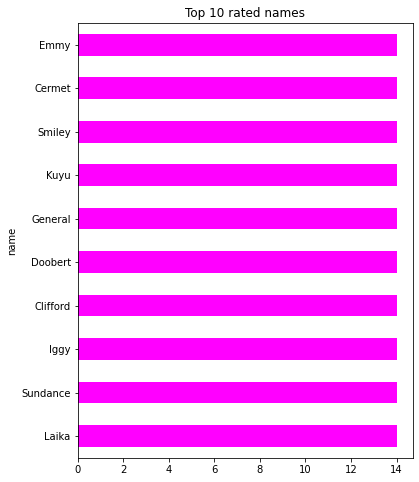

In [75]:
top_10(variable='name', color='magenta')

In [83]:
laika = tweet_df[tweet_df.name == 'Laika']
laika

,tweet_id,tweet_date,source,text,name,retweet_count,favorite_count,bread,age_stage,rating
449,794205286408003585,2016-11-03 15:51:10+00:00,iPhone,This is Laika. She was a space pupper. The fir...,Laika,3102,8741,NaN,pupper,1.4


In [85]:
laika.text[449]

'This is Laika. She was a space pupper. The first space pupper actually. Orbited earth like a h*ckin boss. 14/10 hero af https://t.co/trSjgY3h4g'

> **Observations**: The top 10 rated names are: `Sundance`, `Laika`, `Clifford`, `Iggy`, `Smiley`, `General`, `Emmy`, `Kuyu`, `Cermet`, `Doobert` with an average rating of `14/10` each

#### Q3 : What are the top 10 rated breads ?

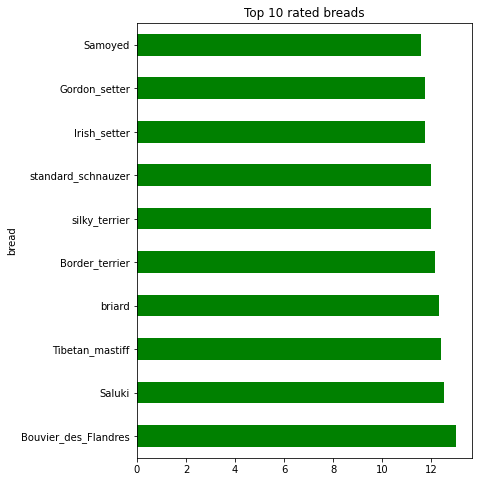

In [76]:
top_10(variable='bread', color='green')

> **Observations**: The top 10 rating breads are `Bouvier_des_Frandes`, `Saluki`, `Tibetan_mastiff`, `briard`, `Border_terrier`, `silky_terrier`, `standard_schnauzer`, `Irish_setter`, `Gordon_setter`, and `Samoyed` with rating from `13/10` to `12/10` respectively

#### Q4 : Is rating correlated to favorite_count and retweet_count ?

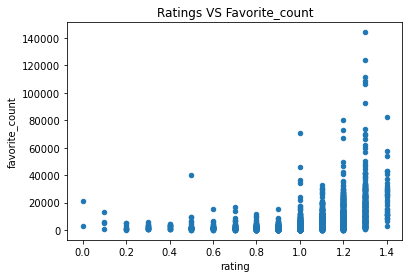

In [77]:
tweet_df.plot.scatter(x='rating', y='favorite_count')
plt.title('Ratings VS Favorite_count');

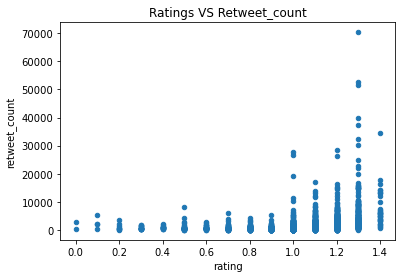

In [78]:
tweet_df.plot.scatter(x='rating', y='retweet_count')
plt.title('Ratings VS Retweet_count');

> **Observation**: There is a positive but not high correlation between `rating` and `favorite_count`, then `rating` and `retweet_count`.

#### Q5 : What are the top 10 most used dog names  ?

In [79]:
pop_name = tweet_df['name'].value_counts().head(10)
pop_name

Charlie    10
Cooper     10
Oliver     10
Tucker      9
Lucy        9
Penny       9
Winston     8
Sadie       8
Lola        7
Toby        7
Name: name, dtype: int64

In [86]:
charlie = tweet_df[tweet_df.name == 'Charlie']

charlie

,tweet_id,tweet_date,source,text,name,retweet_count,favorite_count,bread,age_stage,rating
193,844580511645339650,2017-03-22 16:04:20+00:00,iPhone,This is Charlie. He wants to know if you have ...,Charlie,2807,15264,NaN,NaN,1.1
198,842846295480000512,2017-03-17 21:13:10+00:00,iPhone,This is Charlie. He's wishing you a very fun a...,Charlie,3311,14191,Labrador_retriever,NaN,1.3
241,833826103416520705,2017-02-20 23:50:09+00:00,iPhone,Meet Charlie. She asked u to change the channe...,Charlie,3483,17047,Chihuahua,NaN,1.3
249,832369877331693569,2017-02-16 23:23:38+00:00,iPhone,This is Charlie. He fell asleep on a heating v...,Charlie,2914,16046,kelpie,NaN,1.1
283,827199976799354881,2017-02-02 17:00:17+00:00,iPhone,This is Charlie. He wins every game of chess h...,Charlie,2056,9975,Great_Dane,NaN,1.3
583,771102124360998913,2016-08-31 21:47:27+00:00,iPhone,This is Charlie. He works for @TODAYshow. Supe...,Charlie,1324,5848,Labrador_retriever,NaN,1.2
1040,703382836347330562,2016-02-27 00:55:11+00:00,iPhone,This is Charlie. He's a West Side Niddlewog. M...,Charlie,1026,3216,golden_retriever,NaN,1.2
1111,697255105972801536,2016-02-10 03:05:46+00:00,iPhone,Meet Charlie. He likes to kiss all the big mil...,Charlie,1052,2842,Great_Dane,NaN,1.0
1321,681891461017812993,2015-12-29 17:36:07+00:00,iPhone,Say hello to Charlie. He's scholarly af. Quite...,Charlie,744,2267,Chihuahua,pupper,1.0
1664,671504605491109889,2015-12-01 01:42:28+00:00,iPhone,This is Charlie. He was just informed that dog...,Charlie,3114,6220,toy_poodle,NaN,1.1


In [87]:
charlie.text[241]

'Meet Charlie. She asked u to change the channel to Animal Planet at least 6 times. Now taking matters into her own paws. 13/10 assertive af https://t.co/WTzhtfevKY'

> **Observations**: The top 10 most used names in tweet are `Charlie`, `Cooper`, `Oliver`, `Tucker`, `Lucy`, `Penny`, `Winston`, `Sadie`, `Lola`, and `Toby`

#### Q6 : What is the most used source of tweets ?

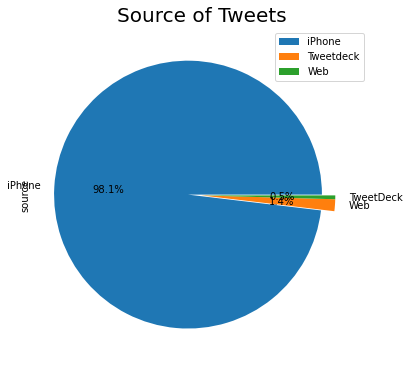

In [80]:
tweet_df['source'].value_counts().plot.pie(figsize=(6,8), autopct='%1.1f%%', explode=(0.1,0,0))
plt.title("Source of Tweets", {'fontsize': 20})
plt.legend(["iPhone", "Tweetdeck", "Web"]);

> **Observation**: The most used source of tweet is `iPhone` with more than 98%

### Insights:
1. The most favorite and retweeted tweet from the dataset has the tweet_id **744234799360020481** posted on an iPhone, on the 2016-06-18 at 18:26:18, the dog was at the `doggo` age_stage and was rated **13/10**

2. The top 10 rated names are: `Sundance`, `Laika`, `Clifford`, `Iggy`, `Smiley`, `General`, `Emmy`, `Kuyu`, `Cermet`, `Doobert` with an average rating of `14/10` each

3. The top 10 rating breads are `Bouvier_des_Frandes`, `Saluki`, `Tibetan_mastiff`, `briard`, `Border_terrier`, `silky_terrier`, `standard_schnauzer`, `Irish_setter`, `Gordon_setter`, and `Samoyed` with rating from `13/10` to `12/10` respectively

4. There is a positive but not high correlation between `rating` and `favorite_count`, then `rating` and `retweet_count`.

5. The top 10 most used names in tweet are `Charlie`, `Cooper`, `Oliver`, `Tucker`, `Lucy`, `Penny`, `Winston`, `Sadie`, `Lola`, and `Toby`
6. The most used source of tweet is `iPhone` with more than 98%